In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip freeze

absl-py==1.4.0
accelerate==0.34.2
aiohappyeyeballs==2.4.3
aiohttp==3.10.9
aiosignal==1.3.1
alabaster==0.7.16
albucore==0.0.16
albumentations==1.4.15
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.19.0
astropy==6.1.4
astropy-iers-data==0.2024.10.7.0.32.46
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.21.0
bigquery-magics==0.4.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.4.3
Bottleneck==1.4.0
bqplot==0.12.43
branca==0.8.0
build==1.2.2.post1
CacheControl==0.14.0
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.8.30
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.87
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.19.0
cloudpickle==2.2.1
cmake==3.30.4
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==

In [2]:
!python --version


Python 3.10.12


In [ ]:
import sys
import keras
import tensorflow as tf
import pandas as pd
import numpy as np

# Python version
print("Python version:", sys.version)

# Keras version
print("Keras version:", keras.__version__)

# TensorFlow version
print("TensorFlow version:", tf.__version__)

# Pandas version
print("Pandas version:", pd.__version__)

# NumPy version
print("NumPy version:", np.__version__)

Python version: 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
Keras version: 3.4.1
TensorFlow version: 2.17.0
Pandas version: 2.1.4
NumPy version: 1.26.4


In [ ]:
!pip install imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load features
path = "/content/drive/MyDrive/Watashara_Projects/ACE/"
# w2vec = pd.read_csv(path + 'features/bow_word2vec_features_ACE.csv').values
esm2 = pd.read_csv(path + 'features/esm2_t6_8M_feat_ACE.csv', header=None).iloc[:, :].values
prot_t5 = pd.read_csv(path + 'features/PortT5.csv', header=None).iloc[:, 1:].values
esmv1 = pd.read_csv(path + 'features/esmv1_feat_ACE.csv', header=None).values
BPF = pd.read_csv(path + 'features/one-hot.csv', header=None).iloc[:, 1:].values
FEGS = pd.read_csv(path + 'features/FEGS_features.csv', header=None).iloc[1:, :].values
fasttext = pd.read_csv(path + 'features/fasttext_features_ACE.csv').values
bert = pd.read_csv(path + 'features/bert_features_ACE.csv').values
deep_feat_bilstm = pd.read_csv(path + 'features/BiLSTM_with_attention.csv',header = None).values

# Combine all features
# all_features = np.column_stack((w2vec, esm2, prot_t5, esmv1, BPF, FEGS, fasttext, bert))
all_feat = np.column_stack((esm2, prot_t5, esmv1,BPF,FEGS,fasttext,bert ))

pd.DataFrame(all_feat).to_csv(path + 'features/esm2_prot_t5_esmv1_BPF_FEGS_fasttext_bert.csv')

# Convert to numpy array
data = np.array(all_feat)


# Labels (adjust the sizes as needed)
label1 = np.ones((394, 1))  # Value can be changed
label2 = np.zeros((626, 1))
labels = np.append(label1, label2)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

print(np.shape(esm2))
print(np.shape(prot_t5))
print(np.shape(esmv1))
print(np.shape(BPF))
print(np.shape(FEGS))
print(np.shape(fasttext))
print(np.shape(bert))
print(np.shape(data_scaled))

(1020, 320)
(1020, 1024)
(1020, 1280)
(1020, 560)
(1020, 578)
(1020, 100)
(1020, 768)
(1020, 4630)


In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd
import math

def categorical_probas_to_classes(p):
    return np.argmax(p, axis=1)

def to_categorical(y, nb_classes=None):
    '''Convert class vector (integers from 0 to nb_classes)
    to binary class matrix, for use with categorical_crossentropy.
    '''
    y = np.array(y, dtype='int')
    if not nb_classes:
        nb_classes = np.max(y)+1
    Y = np.zeros((len(y), nb_classes))
    for i in range(len(y)):
        Y[i, y[i]] = 1.
    return Y


def calculate_performace(test_num, pred_y, labels):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for index in range(test_num):
        if labels[index] == 1:
            if labels[index] == pred_y[index]:
                tp = tp + 1
            else:
                fn = fn + 1
        else:
            if labels[index] == pred_y[index]:
                tn = tn + 1
            else:
                fp = fp + 1

    acc = float(tp + tn) / test_num
    precision = float(tp) / (tp + fp + 1e-06)
    npv = float(tn) / (tn + fn + 1e-06)
    sensitivity = float(tp) / (tp + fn + 1e-06)
    specificity = float(tn) / (tn + fp + 1e-06)
    mcc = float(tp * tn - fp * fn) / (math.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) + 1e-06)
    f1 = float(tp * 2) / (tp * 2 + fp + fn + 1e-06)
    return acc, precision, npv, sensitivity, specificity, mcc, f1

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.5054 - loss: 0.7179 - val_accuracy: 0.5000 - val_loss: 0.6920
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4475 - loss: 0.7424 - val_accuracy: 0.5000 - val_loss: 0.6916
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4817 - loss: 0.7202 - val_accuracy: 0.5000 - val_loss: 0.6906
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5020 - loss: 0.7120 - val_accuracy: 0.5000 - val_loss: 0.6892
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4906 - loss: 0.7211 - val_accuracy: 0.5000 - val_loss: 0.6863
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4885 - loss: 0.7271 - val_accuracy: 0.5000 - val_loss: 0.6812
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5404 - loss: 0.7118 - val_accuracy: 0.8125 - val_loss: 0.6783
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4743 - loss: 0.7205 - val_accuracy: 0.6172 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 1, 32)               │         447,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 1, 16)               │           2,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1, 16)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_64 (Dense)                     │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_16 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_2 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,356,920 (5.18 MB)

 Trainable params: 452,306 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 904,614 (3.45 MB)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step  
Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8624 - loss: 0.4281 - val_accuracy: 0.8504 - val_loss: 0.3688
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8577 - loss: 0.4184 - val_accuracy: 0.8740 - val_loss: 0.3639
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8416 - loss: 0.4444 - val_accuracy: 0.8504 - val_loss: 0.3617
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8635 - loss: 0.3839 - val_accuracy: 0.8740 - val_loss: 0.3609
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8536 - loss: 0.4078 - val_accuracy: 0.8740 - val_loss: 0.3538
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8485 - loss: 0.4060 - val_accuracy: 0.8740 - val_loss: 0.3471
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8845 - loss: 0.3530 - val_accuracy: 0.8583 - val_loss: 0.3509
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8532 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 1, 32)               │         447,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 1, 16)               │           2,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1, 16)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_64 (Dense)                     │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_16 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_2 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,356,920 (5.18 MB)

 Trainable params: 452,306 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 904,614 (3.45 MB)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8944 - loss: 0.2470 - val_accuracy: 0.9685 - val_loss: 0.1273
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8880 - loss: 0.2782 - val_accuracy: 0.9843 - val_loss: 0.0997
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9481 - loss: 0.1944 - val_accuracy: 0.9764 - val_loss: 0.1033
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9472 - loss: 0.1859 - val_accuracy: 0.9764 - val_loss: 0.0975
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9333 - loss: 0.1925 - val_accuracy: 0.9764 - val_loss: 0.0951
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9251 - loss: 0.2133 - val_accuracy: 0.9843 - val_loss: 0.0925
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9658 - loss: 0.1435 - val_accuracy: 0.9764 - val_loss: 0.0918
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9438 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 1, 32)               │         447,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 1, 16)               │           2,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1, 16)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_64 (Dense)                     │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_16 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_2 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,356,920 (5.18 MB)

 Trainable params: 452,306 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 904,614 (3.45 MB)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9776 - loss: 0.1225 - val_accuracy: 0.9921 - val_loss: 0.0227
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9666 - loss: 0.1246 - val_accuracy: 0.9921 - val_loss: 0.0232
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9866 - loss: 0.0788 - val_accuracy: 0.9921 - val_loss: 0.0239
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9728 - loss: 0.0783 - val_accuracy: 0.9921 - val_loss: 0.0251
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9771 - loss: 0.0895 - val_accuracy: 0.9921 - val_loss: 0.0238
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9573 - loss: 0.0963 - val_accuracy: 0.9921 - val_loss: 0.0242
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9704 - loss: 0.0998 - val_accuracy: 0.9843 - val_loss: 0.0324
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9763 - l

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 1, 32)               │         447,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 1, 16)               │           2,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1, 16)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_64 (Dense)                     │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_16 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_2 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,356,920 (5.18 MB)

 Trainable params: 452,306 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 904,614 (3.45 MB)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9686 - loss: 0.1200 - val_accuracy: 1.0000 - val_loss: 0.0071
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9678 - loss: 0.0814 - val_accuracy: 1.0000 - val_loss: 0.0041
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9764 - loss: 0.0657 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9820 - loss: 0.0613 - val_accuracy: 1.0000 - val_loss: 0.0091
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9990 - loss: 0.0362 - val_accuracy: 1.0000 - val_loss: 0.0066
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9895 - loss: 0.0541 - val_accuracy: 1.0000 - val_loss: 0.0081
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9966 - loss: 0.0455 - val_accuracy: 1.0000 - val_loss: 0.0043
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9835 - l

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 1, 32)               │         447,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 1, 16)               │           2,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1, 16)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_64 (Dense)                     │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_16 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_2 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,356,920 (5.18 MB)

 Trainable params: 452,306 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 904,614 (3.45 MB)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


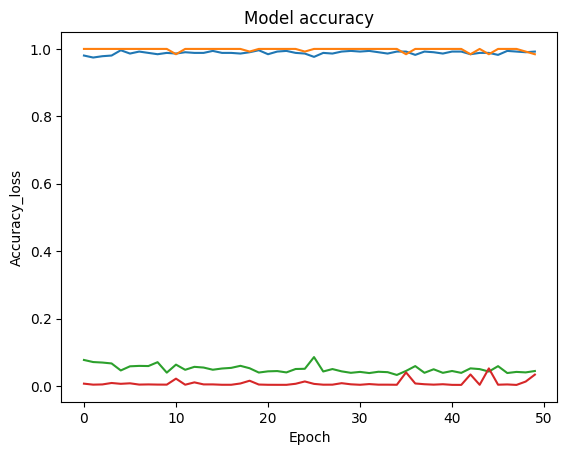

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, GRU, Bidirectional, Conv1D, MaxPooling1D
from tensorflow.keras.models import Sequential, model_from_json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, train_test_split
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
import os
from sklearn.preprocessing import StandardScaler

# Initialize the model
model = Sequential()
model.add(GRU(32, return_sequences=True))
model.add(Dropout(0.5))
model.add(GRU(16, return_sequences=True))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid', name="Dense_64"))
model.add(Dropout(0.7))
model.add(Dense(16, activation='sigmoid', name="Dense_16"))
model.add(Dense(2, activation='sigmoid', name="Dense_2"))
model.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])


# # Load data
path = "/content/drive/MyDrive/Watashara_Projects/ACE/"
# data_ = pd.read_csv(path + 'selected_features_allfeat/EN_ACE_selected_features.csv', header=None)

# Convert to numpy array
data = np.array(all_feat)

# # scaler = StandardScaler()
# # data_scaled = scaler.fit_transform(data)

# data_np = np.array(data_)
# data = data_np[:, :]
label1 = np.ones((394, 1))  # Value can be changed
label2 = np.zeros((626, 1))
labels = np.append(label1, label2)

# # Handle class imbalance


# # Split data
X_train, X_ind, y_train, y_ind = train_test_split(data, labels, test_size=0.2, random_state=42)

# Apply undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train, y_train = undersampler.fit_resample(X_train,y_train)
# oversample = SMOTE()
# X_train, y_train = oversample.fit_resample(X_train, y_train)

# # Convert numpy arrays to DataFrames
X_train_df = pd.DataFrame(X_train)
X_ind_df = pd.DataFrame(X_ind)
y_train_df = pd.DataFrame(y_train)
y_ind_df = pd.DataFrame(y_ind)

fldr_path = path+'Update_results/GRU_all_feat_rUnderSampling/'
if not os.path.exists(fldr_path):
    os.makedirs(fldr_path)

# # Save the training and test data
X_train_data = pd.concat([X_train_df, y_train_df], axis=1)
X_train_data.to_csv(path+'Update_results/GRU_all_feat_rUnderSampling/XtrainData_balanced.csv', index=False)

X_test_data = pd.concat([X_ind_df, y_ind_df], axis=1)
X_test_data.to_csv(path+'Update_results/GRU_all_feat_rUnderSampling/XtestData.csv', index=False)
# # X = np.array(X_train, dtype=float)

# path = "/content/drive/MyDrive/Watashara_Projects/ACE/"
# train_data = pd.read_csv(path + 'selected_features_allfeat/XtrainData_wSMOTE.csv')


# X_train = train_data.iloc[:, :-1].values
# y_train = train_data.iloc[:, -1].values

# print(np.shape(X_train))
# print(np.shape(y_train))

[m1, n1] = np.shape(X_train)
y = y_train
X = np.reshape(X_train, (-1, 1, n1))


# Cross-validation
sepscores = []
ytest = np.ones((1, 2)) * 0.5
yscore = np.ones((1, 2)) * 0.5
skf = StratifiedKFold(n_splits=5)

for i, (train, test) in enumerate (skf.split(X,y)):
    y_train = to_categorical(y[train])
    y_test = to_categorical(y[test])
    history = model.fit(X[train], y_train, validation_data=(X[test], y_test), batch_size=28, epochs=50)
    model.summary()
    y_score = model.predict(X[test])
    y_class= categorical_probas_to_classes(y_score)

    ytest = np.vstack((ytest, y_test))
    y_test_tmp = y[test]
    yscore = np.vstack((yscore, y_score))

    # Calculate performance
    acc, precision, npv, sensitivity, specificity, mcc, f1 = calculate_performace(len(y_class), y_class, y[test])
    fpr, tpr, _ = roc_curve(y_test[:, 1], y_score[:, 1])
    roc_auc = auc(fpr, tpr)
    sepscores.append([acc, precision, npv, sensitivity, specificity, mcc, f1, roc_auc])
    model.save(f'{fldr_path}/' + str(i) + 'GRU_new.keras')


# Save results
scores = np.array(sepscores)
result1 = np.mean(scores, axis=0)
H1 = result1.tolist()
sepscores.append(H1)
result = sepscores

row = yscore.shape[0]
yscore = yscore[np.array(range(1, row)), :]
yscore_sum = pd.DataFrame(data=yscore)
yscore_sum.to_csv(f'{fldr_path}/GRU_yscore.csv')

ytest = ytest[np.array(range(1, row)), :]
ytest_sum = pd.DataFrame(data=ytest)
ytest_sum.to_csv(f'{fldr_path}/GRU_ytest.csv')

data_csv = pd.DataFrame(data=result)
data_csv.to_csv(f'{fldr_path}/GRU_CNN_CV_results.csv')

# Plot history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy_loss')
plt.xlabel('Epoch')
plt.show()


**Indpendent data test **

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import Sequential, load_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd
import math

path = "/content/drive/MyDrive/Watashara_Projects/ACE/"
# data_ = pd.read_csv(path + 'Dts_AEDN1000.csv')
# data = data_.iloc[:, :-1].values
# labels = data_.iloc[:, -1].values
# y = labels
# shu = scale(data)
# Xt = shu
# yt = labels
# X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

folder_name = "Update_results/GRU_all_feat_rUnderSampling"

# test_feat = pd.read_csv(path + 'selected_features_allfeat/XtestData.csv')


# Xt = test_feat.iloc[:, :-1].values
# yt = test_feat.iloc[:, -1].values



Xt = X_ind
yt = y_ind
#
print(Xt.shape)
print(yt.shape)
###########################################################################################
[sample_num, input_dim] = np.shape(Xt)
Xt = np.reshape(Xt, (-1, 1, input_dim))




sepscores = []
ytest = np.ones((1, 2)) * 0.5
yscore = np.ones((1, 2)) * 0.5

for i in range(5):

    loaded_model = load_model(path+ f'{folder_name}/' + str(i) + 'GRU_new.keras')
    print("Loaded model from disk")

    # evaluate loaded model on test data

    y_score = loaded_model.predict(Xt)
    y_class = categorical_probas_to_classes(y_score)

    y_test = to_categorical(yt)
    ytest = np.vstack((ytest, y_test))
    y_test_tmp = yt
    yscore = np.vstack((yscore, y_score))

    acc, precision, npv, sensitivity, specificity, mcc, f1 = calculate_performace(len(y_class), y_class, y_test_tmp)
    fpr, tpr, _ = roc_curve(y_test[:, 1], y_score[:, 1])
    roc_auc = auc(fpr, tpr)
    sepscores.append([acc, sensitivity, specificity, mcc, f1, roc_auc])
    print(f'CNN:acc={acc:.6f},sensitivity={sensitivity:.6f},specificity={specificity:.6f},mcc={mcc:.6f},f1={f1:.6f},roc_auc={roc_auc:.6f}')


row=ytest.shape[0]
ytest=ytest[np.array(range(1,row)),:]
ytest_sum = pd.DataFrame(data=ytest)
ytest_sum.to_csv(path+ f'{folder_name}/GRU_ytest_test.csv')

yscore_=yscore[np.array(range(1,row)),:]
yscore_sum = pd.DataFrame(data=yscore_)
yscore_sum.to_csv(path+ f'{folder_name}/GRU_yscore_test.csv')

scores = np.array(sepscores)
result1 = np.mean(scores, axis=0)
H1 = result1.tolist()
sepscores.append(H1)
result = sepscores

data_csv = pd.DataFrame(data=result)
data_csv.to_csv(path+ f'{folder_name}/GRU_test_results.csv')





(204, 4630)
(204,)
Loaded model from disk
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
CNN:acc=0.769608,sensitivity=0.750000,specificity=0.781250,mcc=0.520988,f1=0.708075,roc_auc=0.837891
Loaded model from disk
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
CNN:acc=0.828431,sensitivity=0.723684,specificity=0.890625,mcc=0.627780,f1=0.758621,roc_auc=0.901521
Loaded model from disk


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
CNN:acc=0.838235,sensitivity=0.855263,specificity=0.828125,mcc=0.668077,f1=0.797546,roc_auc=0.919100
Loaded model from disk


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
CNN:acc=0.823529,sensitivity=0.789474,specificity=0.843750,mcc=0.627066,f1=0.769231,roc_auc=0.915399
Loaded model from disk
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
CNN:acc=0.833333,sensitivity=0.736842,specificity=0.890625,mcc=0.639001,f1=0.767123,roc_auc=0.917352


In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 8.3 MB/s eta 0:00:00


In [ ]:
import shap
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense, Dropout, Flatten, GRU
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# Initialize the GRU model
model = Sequential()
model.add(GRU(32, return_sequences=True))
model.add(Dropout(0.5))
model.add(GRU(16, return_sequences=False))  # No return_sequences at the last GRU layer
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid', name="Dense_64"))
model.add(Dropout(0.7))
model.add(Dense(16, activation='sigmoid', name="Dense_16"))
model.add(Dense(2, activation='sigmoid', name="Dense_2"))
model.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])

# Custom prediction function to reshape input for the model
def model_predict_3D(X):
    # Reshape 2D data back to 3D (samples, 1, features) before passing to the model
    X_reshaped = X.reshape((X.shape[0], 1, X.shape[1]))  # Adding the time step dimension (1 in this case)
    return model.predict(X_reshaped)

# Load data
path = "/content/drive/MyDrive/Watashara_Projects/ACE/"
X_train = pd.read_csv(path + 'XtrainData_EN_wSMOTE.csv', header=0)

# Get feature names from the dataframe
feature_names = X_train.columns[:-1]  # Assuming the last column is the label

# Separate features and labels
Xt = X_train.iloc[:, :-1].values  # Test features (excluding last column for labels)
yt = X_train.iloc[:, -1].values   # Test labels (assuming the last column contains labels)

# # Normalize data if necessary
# scaler = StandardScaler()
# Xt_scaled = scaler.fit_transform(Xt)

# # Split into train and test sets (optional step based on your use case)
# X_train, X_test, y_train, y_test = train_test_split(Xt_scaled, yt, test_size=0.2, random_state=42)

# Use the 2D version of X_train for SHAP (no reshaping necessary)
X_test_2D = X_train

# Initialize the SHAP Kernel Explainer with the reshaped prediction function
explainer = shap.KernelExplainer(model_predict_3D, X_test_2D)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_2D)

# SHAP summary plot (bar chart for feature importance)
shap.summary_plot(shap_values, X_test_2D, feature_names=feature_names, plot_type="bar")

# SHAP dependency plot for a specific feature (e.g., feature 0)
shap.dependence_plot(0, shap_values[0], X_test_2D, feature_names=feature_names)

# SHAP force plot for the first instance in the test set
shap.force_plot(explainer.expected_value[0], shap_values[0][0, :], X_test_2D[0, :], feature_names=feature_names, matplotlib=True)

# SHAP summary for top 100 features
top_100_indices = np.argsort(np.abs(shap_values[0]).mean(0))[-100:]
plt.figure(figsize=(20, 15), dpi=300)
shap.summary_plot(shap_values[:, top_100_indices], X_test_2D[:, top_100_indices], feature_names=feature_names[top_100_indices], show=False)
plt.savefig(os.path.join(os.getcwd(), 'HD3Ci_shap_top100_training.pdf'), orientation='landscape', bbox_inches="tight", format='pdf', dpi=450)
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step


  0%|          | 0/996 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [ ]:
import shap
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense, Dropout, Flatten, GRU
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import os

# Initialize the GRU model
model = Sequential()
model.add(GRU(32, return_sequences=True))
model.add(Dropout(0.5))
model.add(GRU(16, return_sequences=False))  # No return_sequences at the last GRU layer
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid', name="Dense_64"))
model.add(Dropout(0.7))
model.add(Dense(16, activation='sigmoid', name="Dense_16"))
model.add(Dense(2, activation='sigmoid', name="Dense_2"))
model.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])

# Custom prediction function to reshape input for the model
def model_predict_3D(X):
    X_reshaped = X.reshape((X.shape[0], 1, X.shape[1]))  # Adding the time step dimension (1 in this case)
    return model.predict(X_reshaped)

# Load data
path = "/content/drive/MyDrive/"
X_train = pd.read_csv(path + 'XtrainData_EN_wSMOTE.csv', header=0)

# Get feature names from the dataframe
feature_names = X_train.columns[:-1]  # Assuming the last column is the label

# Separate features and labels
Xt = X_train.iloc[:, :-1].values  # Test features (excluding last column for labels)
yt = X_train.iloc[:, -1].values   # Test labels (assuming the last column contains labels)

# Normalize data if necessary
scaler = StandardScaler()
Xt_scaled = scaler.fit_transform(Xt)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(Xt_scaled, yt, test_size=0.2, random_state=42)

# Use the 2D version of X_test for SHAP (no reshaping necessary)
X_test_2D = X_test

# Initialize the SHAP Kernel Explainer with the reshaped prediction function
explainer = shap.KernelExplainer(model_predict_3D, X_test_2D)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_2D)

plt.figure(figsize=(20, 15), dpi=300)
# SHAP summary plot (bar chart for feature importance)
shap.summary_plot(shap_values, X_test_2D, feature_names=feature_names, plot_type="bar")

# SHAP force plot for the first instance in the test set
shap.force_plot(explainer.expected_value[0], shap_values[0][0, :], X_test_2D[0, :], feature_names=feature_names, matplotlib=True)

# SHAP summary for top 50 features
top_50_indices = np.argsort(np.abs(shap_values[0]).mean(0))[-50:]

shap.summary_plot(np.array(shap_values[0])[:, top_50_indices], X_test_2D[:, top_50_indices], feature_names=feature_names[top_50_indices], show=False)
plt.savefig(os.path.join(os.getcwd(), 'HD3Ci_shap_top50_training.pdf'), orientation='landscape', bbox_inches="tight", format='pdf', dpi=450)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/XtrainData_EN_wSMOTE.csv'

In [ ]:
import shap
import numpy as np

# Reduce the background data to K representative samples using K-means
K = 50  # Set the number of samples to a smaller value like 50

def model_predict_3D(X):
    # Reshape 2D data back to 3D (samples, 1, features) before passing to the model
    X_reshaped = X.reshape((X.shape[0], 1, X.shape[1]))  # Adding the time step dimension (1 in this case)
    return model.predict(X_reshaped)

# Use the 2D version of X_train for SHAP (no reshaping necessary)
X_test_2D = X_train
X_summary = shap.kmeans(X_test_2D, K)

# Initialize the SHAP Kernel Explainer with the reduced background data
explainer = shap.KernelExplainer(model_predict_3D, X_summary)

# Calculate SHAP values for the original test data
shap_values = explainer.shap_values(X_test_2D)

# SHAP summary plot
shap.summary_plot(shap_values, X_test_2D, plot_type="bar")

plt.figure(figsize=(20, 15), dpi=300)
shap.summary_plot(shap_values[:, top_20_indices], Xt_reshaped[:, top_20_indices], feature_names=sorted_feature_names, show=False, class_names=['Positive', 'Negative'])
ax = plt.gca()
fig = plt.gcf()
fig.savefig(os.path.join(os.getcwd(), 'HD3Ci_shap_top100_training.pdf'), orientation='landscape', bbox_inches="tight", format='pdf', dpi=450)



NameError: name 'X_train' is not defined